<a href="https://colab.research.google.com/github/MouhtaramSoufiane/Projets-Machine-Learning/blob/master/MOUHTARAM_Soufiane_exam_ML_SDIA_23_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Partie :1

In [ ]:
# Soufiane MOUHTARAM
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Soufiane MOUHTARAM

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

###Reading data

In [ ]:
# Soufiane MOUHTARAM
occupancy=pd.read_csv("occupancy.csv")

let s show the first rows of our dataset

In [ ]:
# Soufiane MOUHTARAM
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Let’s have a look at data dimensionality, features names, and feature types.

In [ ]:
# Soufiane MOUHTARAM
occupancy.shape

(2665, 7)

We can use the info() method to output some general information about the dataframe:

In [ ]:
# Soufiane MOUHTARAM

occupancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


if we use Prior Knowledge we should remove the coulmn Date from dadaset because we do not need it

In [ ]:
# Soufiane MOUHTARAM

occupancy=occupancy.drop('date',axis=1)

describe our dataset

In [ ]:
# Soufiane MOUHTARAM

occupancy.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


identify the feautures and target for dataset occupancy

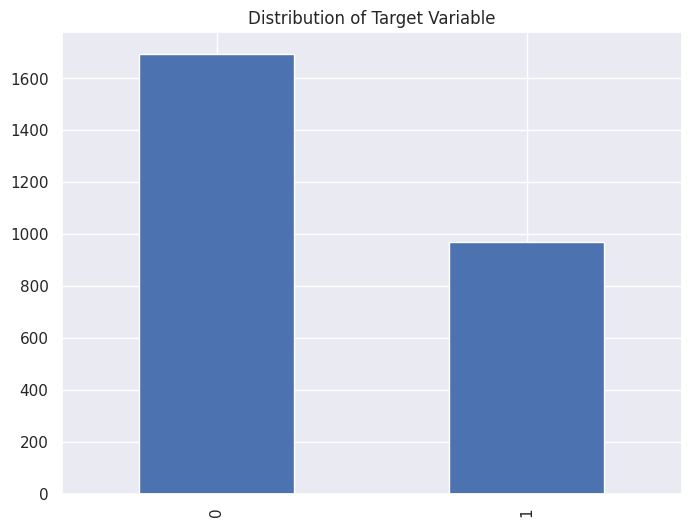

In [ ]:
# Soufiane MOUHTARAM

(occupancy['Occupancy'].value_counts().plot(
        kind='bar',
        figsize=(8, 6),
        title='Distribution of Target Variable',
    )
);
plt.show()

In [ ]:
# Soufiane MOUHTARAM

occupancy['Occupancy'].value_counts()

0    1693
1     972
Name: Occupancy, dtype: int64

Standarization data 

To standarize our dataset we must Import the library: 
sklearn.preprocessing import StandardScaler

In [ ]:
# Soufiane MOUHTARAM

from sklearn.preprocessing import StandardScaler
# initialize the scaler
scaler = StandardScaler()

# Apply the transormation


OccupancyStand =scaler.fit_transform(occupancy.drop('Occupancy',axis=1))
OccupancyStand


array([[2.20476235, 0.37681367, 1.56686218, 0.10694007, 1.20754022],
       [2.22227495, 0.38420166, 1.53968001, 0.14521407, 1.22146086],
       [2.23395002, 0.35957501, 1.51676171, 0.17688126, 1.20916118],
       ...,
       [2.81770341, 0.14203962, 2.4934545 , 1.39390353, 1.33301272],
       [2.84364801, 0.14203962, 2.47746498, 1.38433502, 1.34579091],
       [2.89391566, 0.13451481, 2.41750431, 1.38775235, 1.36487235]])

In [ ]:
# Soufiane MOUHTARAM

OccupancyV2=pd.DataFrame(OccupancyStand,
                        columns=['Temperature',	'Humidity',	'Light',	'CO2',	'HumidityRatio'])

OccupancyV2

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.204762,0.376814,1.566862,0.106940,1.207540
1,2.222275,0.384202,1.539680,0.145214,1.221461
2,2.233950,0.359575,1.516762,0.176881,1.209161
3,2.226653,0.316478,1.201302,0.194253,1.174140
4,2.257300,0.347262,1.180715,0.208776,1.211522
...,...,...,...,...,...
2660,2.778787,0.142040,2.457478,1.477457,1.313879
2661,2.817703,0.156816,2.464673,1.405522,1.344207
2662,2.817703,0.142040,2.493454,1.393904,1.333013
2663,2.843648,0.142040,2.477465,1.384335,1.345791


###Correlation

In [ ]:
# Soufiane MOUHTARAM

# Calculate Correlation
corr_matrix = occupancy.corr()  # corr(autinsurance)
corr_matrix

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,0.716988,0.768428,0.870226,0.894548,0.705784
Humidity,0.716988,1.000000,0.561905,0.911611,0.951914,0.610764
Light,0.768428,0.561905,1.000000,0.769167,0.693286,0.927949
CO2,0.870226,0.911611,0.769167,1.000000,0.964440,0.768030
HumidityRatio,0.894548,0.951914,0.693286,0.964440,1.000000,0.700330
Occupancy,0.705784,0.610764,0.927949,0.768030,0.700330,1.000000


let s visualize that on heatmap

<Axes: >

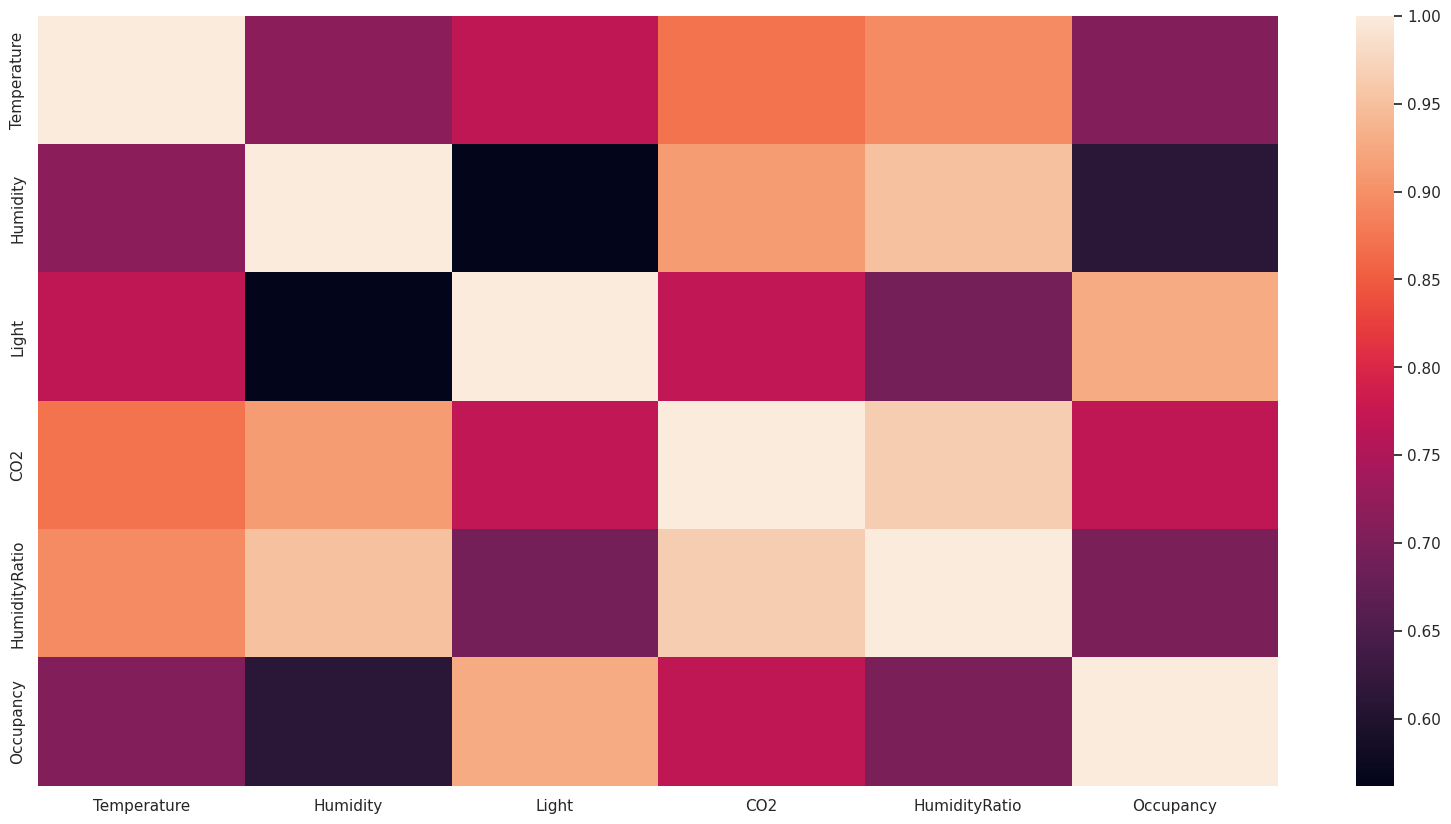

In [ ]:
# Soufiane MOUHTARAM

plt.rcParams['figure.figsize'] = 20,10  # control plot sizeimport seaborn as sns
sns.heatmap(occupancy.corr())

###Identify the features X and target

Data split & Scaling Data Preprocessing

In [ ]:
# Soufiane MOUHTARAM

x=OccupancyV2.drop('CO2',axis=1)
y=OccupancyV2.drop(['Temperature',	'Humidity',	'Light',	'HumidityRatio'],axis=1)
y

,CO2
0,0.106940
1,0.145214
2,0.176881
3,0.194253
4,0.208776
...,...
2660,1.477457
2661,1.405522
2662,1.393904
2663,1.384335


In [ ]:
# Soufiane MOUHTARAM

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(x,y,
                                               test_size = .2,
                                               random_state= 45)
     

In [ ]:
# Soufiane MOUHTARAM

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(training_target)

#view transformed values


In [ ]:
test_features

,Temperature,Humidity,Light,HumidityRatio
1538,1.416695,2.231200,1.066390,2.120712
1195,0.258918,1.115818,1.122354,0.786452
2554,-0.212950,-0.057026,1.052400,-0.165159
2287,-0.714005,-0.309449,-0.772404,-0.519712
1749,0.064333,1.127106,-0.772404,0.703207
...,...,...,...,...
1307,0.815429,0.880839,1.506102,0.893494
2597,1.037256,0.128358,1.833887,0.488966
1588,1.231840,2.427187,0.996436,2.154806
634,-0.843728,-1.257575,-0.772404,-1.138725


In [ ]:
training_target


,CO2
962,-0.972478
46,1.152811
1832,-0.148903
2526,-0.135519
893,-0.965928
...,...
163,0.399292
607,-0.918940
1916,-0.459880
1667,1.695311


In [ ]:
test_target

,CO2
1538,2.293343
1195,1.226284
2554,0.096574
2287,-0.836924
1749,0.447989
...,...
1307,1.206634
2597,0.760104
1588,2.314986
634,-0.910966


identify the features X and target Y for our dataset

In [ ]:
OccupancyV2

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.204762,0.376814,1.566862,0.106940,1.207540
1,2.222275,0.384202,1.539680,0.145214,1.221461
2,2.233950,0.359575,1.516762,0.176881,1.209161
3,2.226653,0.316478,1.201302,0.194253,1.174140
4,2.257300,0.347262,1.180715,0.208776,1.211522
...,...,...,...,...,...
2660,2.778787,0.142040,2.457478,1.477457,1.313879
2661,2.817703,0.156816,2.464673,1.405522,1.344207
2662,2.817703,0.142040,2.493454,1.393904,1.333013
2663,2.843648,0.142040,2.477465,1.384335,1.345791


In [ ]:
# Soufiane MOUHTARAM


X1=training_features['Temperature'].to_numpy()
X2=training_features['Humidity'].to_numpy()
X3=training_features['Light'].to_numpy()
X4=training_features['HumidityRatio'].to_numpy()
y=training_target['CO2'].to_numpy()
#Reshaping Dim
X1=X1.reshape(X1.shape[0],1)
X2=X2.reshape(X1.shape[0],1)
X3=X3.reshape(X1.shape[0],1)
X4=X4.reshape(X1.shape[0],1)

y=y.reshape(y.shape[0],1)
y.shape


(2132, 1)

In [ ]:
# Soufiane MOUHTARAM

# Création de la matrice X, inclut le Biais
X = np.hstack((X1,X2,X3,X4,np.ones(X1.shape)))
print(X.shape)
print(X[:10])

(2132, 5)
[[-1.11290278 -1.06466618 -0.77240366 -1.11791575  1.        ]
 [ 2.01017788  1.07703138  1.04240614  1.61804618  1.        ]
 [-0.32483569  0.55248376 -0.77240366  0.16790055  1.        ]
 [-0.55347244  0.00454083  0.97844808 -0.26517842  1.        ]
 [-1.01561054 -1.17138166 -0.77240366 -1.14709231  1.        ]
 [-0.96209982 -0.63062149  0.83853984 -0.80643878  1.        ]
 [-0.90858909 -1.23705272 -0.77240366 -1.14898773  1.        ]
 [-0.90858909 -0.60086429  0.85719427 -0.76885103  1.        ]
 [ 1.77083899  0.13383073  1.66199979  0.82646857  1.        ]
 [ 1.80586419  0.220024   -0.08005772  0.90403103  1.        ]]


In [ ]:
# Soufiane MOUHTARAM

# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(5, 1)
theta.shape

(5, 1)

In [ ]:
# Soufiane MOUHTARAM

def model(X, theta): # définir le modèle
    return X.dot(theta)

In [ ]:
# Soufiane MOUHTARAM

def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)



In [ ]:
# Soufiane MOUHTARAM

print(X.shape)
print(y.shape)
print(theta.shape)

(2132, 5)
(2132, 1)
(5, 1)


In [ ]:
# Soufiane MOUHTARAM

cost_function(X, y, theta)

10.83794000068958

In [ ]:
# Soufiane MOUHTARAM

#définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
# Soufiane MOUHTARAM

# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [ ]:
# Soufiane MOUHTARAM

# Entrainement du modèle
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [ ]:
# Soufiane MOUHTARAM

# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final


array([[-0.01190063],
       [-0.0046227 ],
       [ 0.1769695 ],
       [ 0.85841547],
       [ 0.00182444]])

####Predictions 

In [ ]:
predictions

array([[-1.07633775],
       [ 1.54635324],
       [ 0.01057276],
       ...,
       [-0.25185229],
       [ 1.66181952],
       [-0.78624425]])

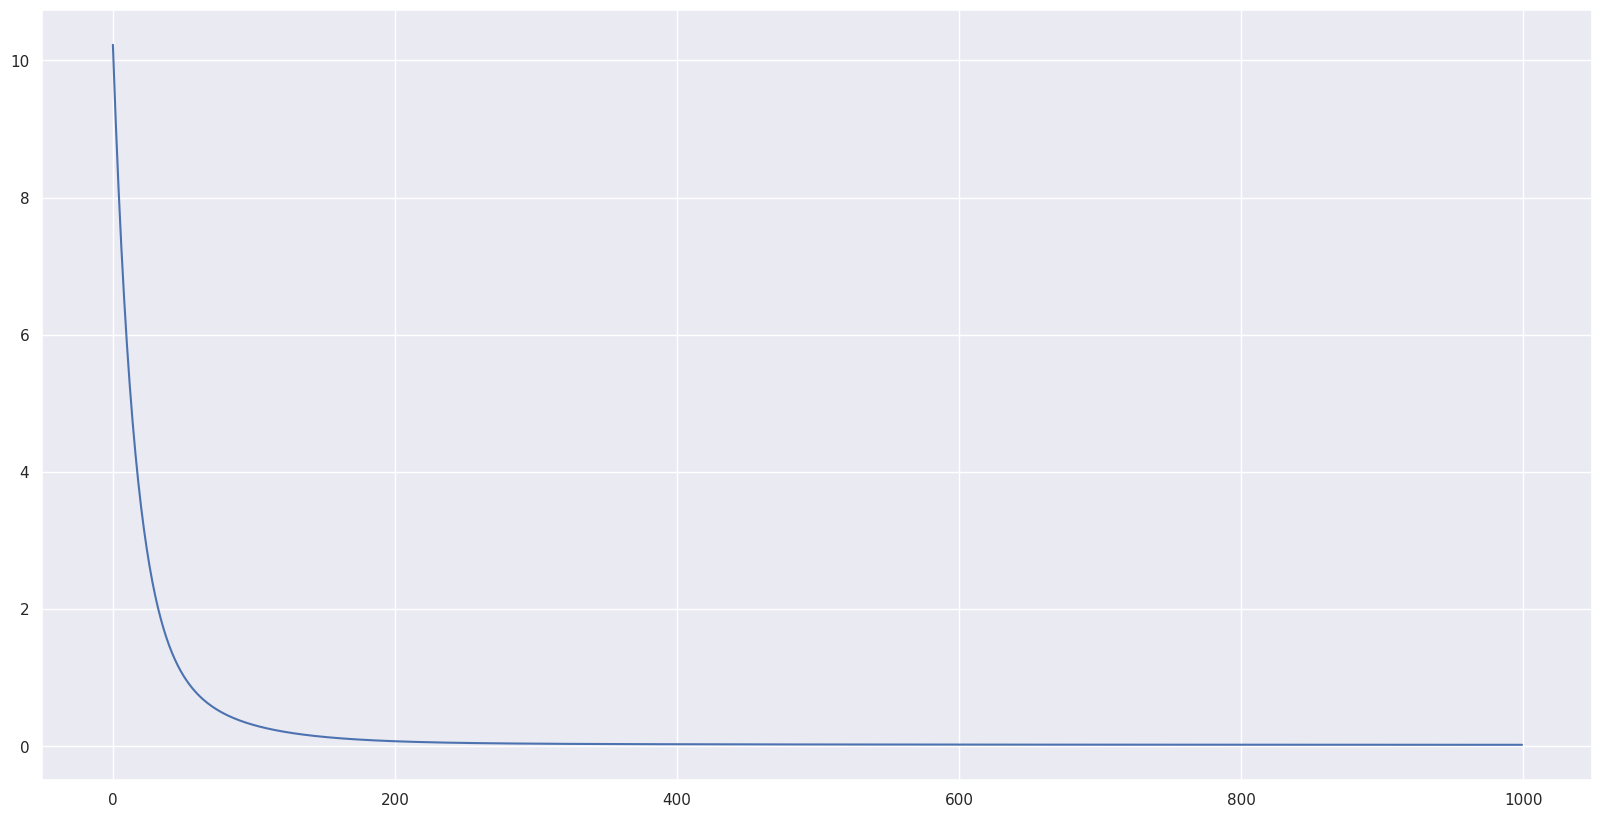

In [ ]:
# Soufiane MOUHTARAM

# Courbe d'apprentissage
plt.plot(range(n_iterations), cost_history)
plt.show()

In [ ]:
# Soufiane MOUHTARAM

# Confusion Matrix
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Soufiane MOUHTARAM

# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
# Soufiane MOUHTARAM

#Accuracy
print(" Prediction Accuracy : {:.2f}%".format(coef_determination(y, predictions) * 100))

 Prediction Accuracy : 95.18%


##Partie 2

###Logistic Regression Model (From scratch)

In [ ]:
# Soufiane MOUHTARAM

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)
     

# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A
     

def log_los(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)
     

def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)
     

def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

In [ ]:
# Soufiane MOUHTARAM

from sklearn.metrics import log_loss
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        A = np.clip(A, 1e-15, 1 - 1e-15)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)
        
    return W,b,loss_history

In [ ]:
OccupancyV2

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.204762,0.376814,1.566862,0.106940,1.207540
1,2.222275,0.384202,1.539680,0.145214,1.221461
2,2.233950,0.359575,1.516762,0.176881,1.209161
3,2.226653,0.316478,1.201302,0.194253,1.174140
4,2.257300,0.347262,1.180715,0.208776,1.211522
...,...,...,...,...,...
2660,2.778787,0.142040,2.457478,1.477457,1.313879
2661,2.817703,0.156816,2.464673,1.405522,1.344207
2662,2.817703,0.142040,2.493454,1.393904,1.333013
2663,2.843648,0.142040,2.477465,1.384335,1.345791


###Identify the feautures X and target Y

In [ ]:
# Soufiane MOUHTARAM

X=OccupancyV2.drop(['Temperature',	'Humidity',	'HumidityRatio'],axis=1)
y=occupancy.Occupancy
X

,Light,CO2
0,1.566862,0.106940
1,1.539680,0.145214
2,1.516762,0.176881
3,1.201302,0.194253
4,1.180715,0.208776
...,...,...
2660,2.457478,1.477457
2661,2.464673,1.405522
2662,2.493454,1.393904
2663,2.477465,1.384335


In [ ]:
# Soufiane MOUHTARAM

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state= 45)

In [ ]:
# Soufiane MOUHTARAM

X1=training_features['CO2'].to_numpy()
X2=training_features['Light'].to_numpy()

y=training_target.to_numpy()
#Reshaping Dim
X1=X1.reshape(X1.shape[0],1)
X2=X2.reshape(X2.shape[0],1)


y=y.reshape(y.shape[0],1)
y.shape
y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
# Soufiane MOUHTARAM

X1_tarin=test_features['CO2'].to_numpy()
X2_tarin=test_features['Light'].to_numpy()

y_train=test_target.to_numpy()
#Reshaping Dim
X1_tarin=X1_tarin.reshape(X1_tarin.shape[0],1)
X2_tarin=X2_tarin.reshape(X2_tarin.shape[0],1)


y_train=y_train.reshape(y_train.shape[0],1)
y_train.shape


(533, 1)

In [ ]:
# Soufiane MOUHTARAM

# Création de la matrice X, inclut le Biais
X_train = np.hstack((X1_tarin,X2_tarin,np.ones(X1_tarin.shape)))
print(X_train.shape)
print(X_train[:10])

(533, 3)
[[ 2.29334267  1.06639041  1.        ]
 [ 1.22628388  1.1223537   1.        ]
 [ 0.09657419  1.05239958  1.        ]
 [-0.83692426 -0.77240366  1.        ]
 [ 0.4479888  -0.77240366  1.        ]
 [-0.92150298 -0.77240366  1.        ]
 [-0.85144788 -0.77240366  1.        ]
 [-0.23091917 -0.77240366  1.        ]
 [ 2.25290436  0.99044022  1.        ]
 [ 1.03576818  1.11835633  1.        ]]


In [ ]:
# Soufiane MOUHTARAM

# Création de la matrice X, inclut le Biais
X = np.hstack((X1,X2,np.ones(X1.shape)))
print(X.shape)
print(X[:10])

(533, 3)
[[ 2.29334267  1.06639041  1.        ]
 [ 1.22628388  1.1223537   1.        ]
 [ 0.09657419  1.05239958  1.        ]
 [-0.83692426 -0.77240366  1.        ]
 [ 0.4479888  -0.77240366  1.        ]
 [-0.92150298 -0.77240366  1.        ]
 [-0.85144788 -0.77240366  1.        ]
 [-0.23091917 -0.77240366  1.        ]
 [ 2.25290436  0.99044022  1.        ]
 [ 1.03576818  1.11835633  1.        ]]


In [ ]:
# Soufiane MOUHTARAM

W,b,loss_history=regression_logistique(X,y)
L_pred=predict(X_train,W,b)
# Making the Confusion Matrix
y_test_transformed = lab.fit_transform(test_target)

Matrix= confusion_matrix(y_test_transformed, L_pred)
Matrix

array([[316,   9],
       [  0, 208]])

In [ ]:
# Soufiane MOUHTARAM

y_test_transformed=y_test_transformed.reshape(y_test_transformed.shape[0],1)
y_test_transformed.shape,L_pred.shape

((533, 1), (533, 1))

In [ ]:
# Soufiane MOUHTARAM

# Accuracy Score
Matrix= accuracy_score(y_test_transformed, L_pred )

print("Prediction Accuracy : {:.2f}%".format(Matrix * 100))

Prediction Accuracy : 98.31%


###Confusion Matrix

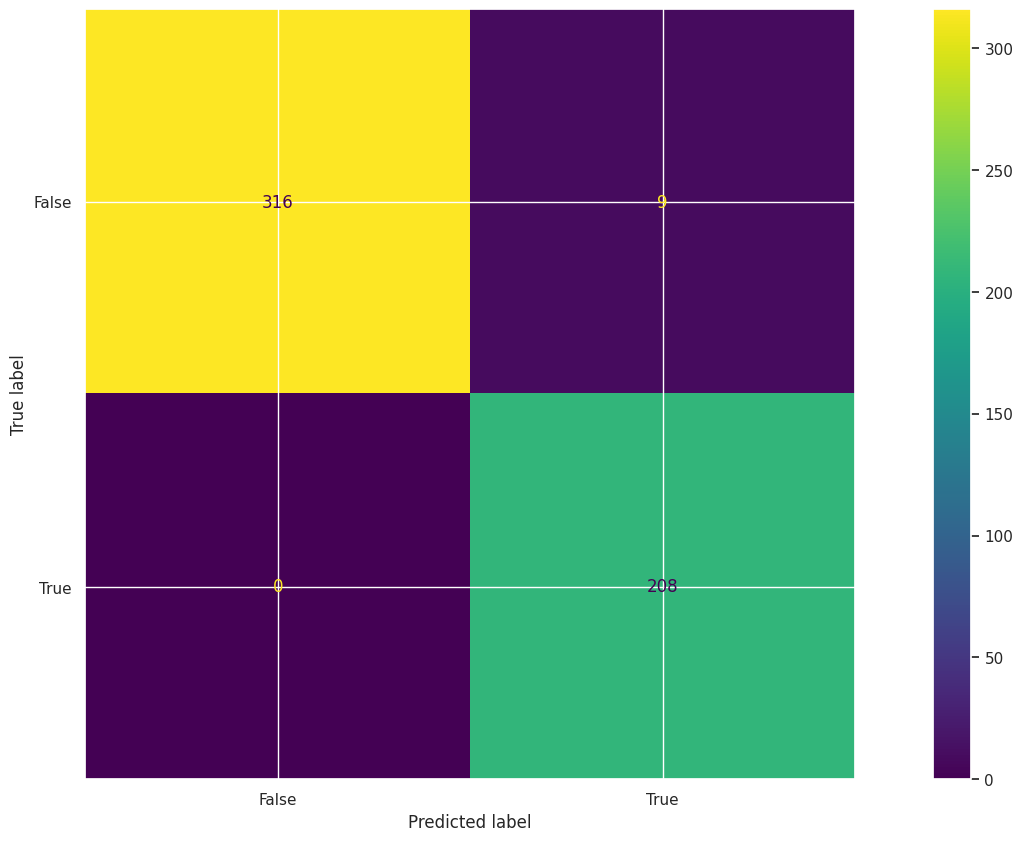

In [ ]:
# Soufiane MOUHTARAM

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test_transformed, L_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'Evolution des erreurs')

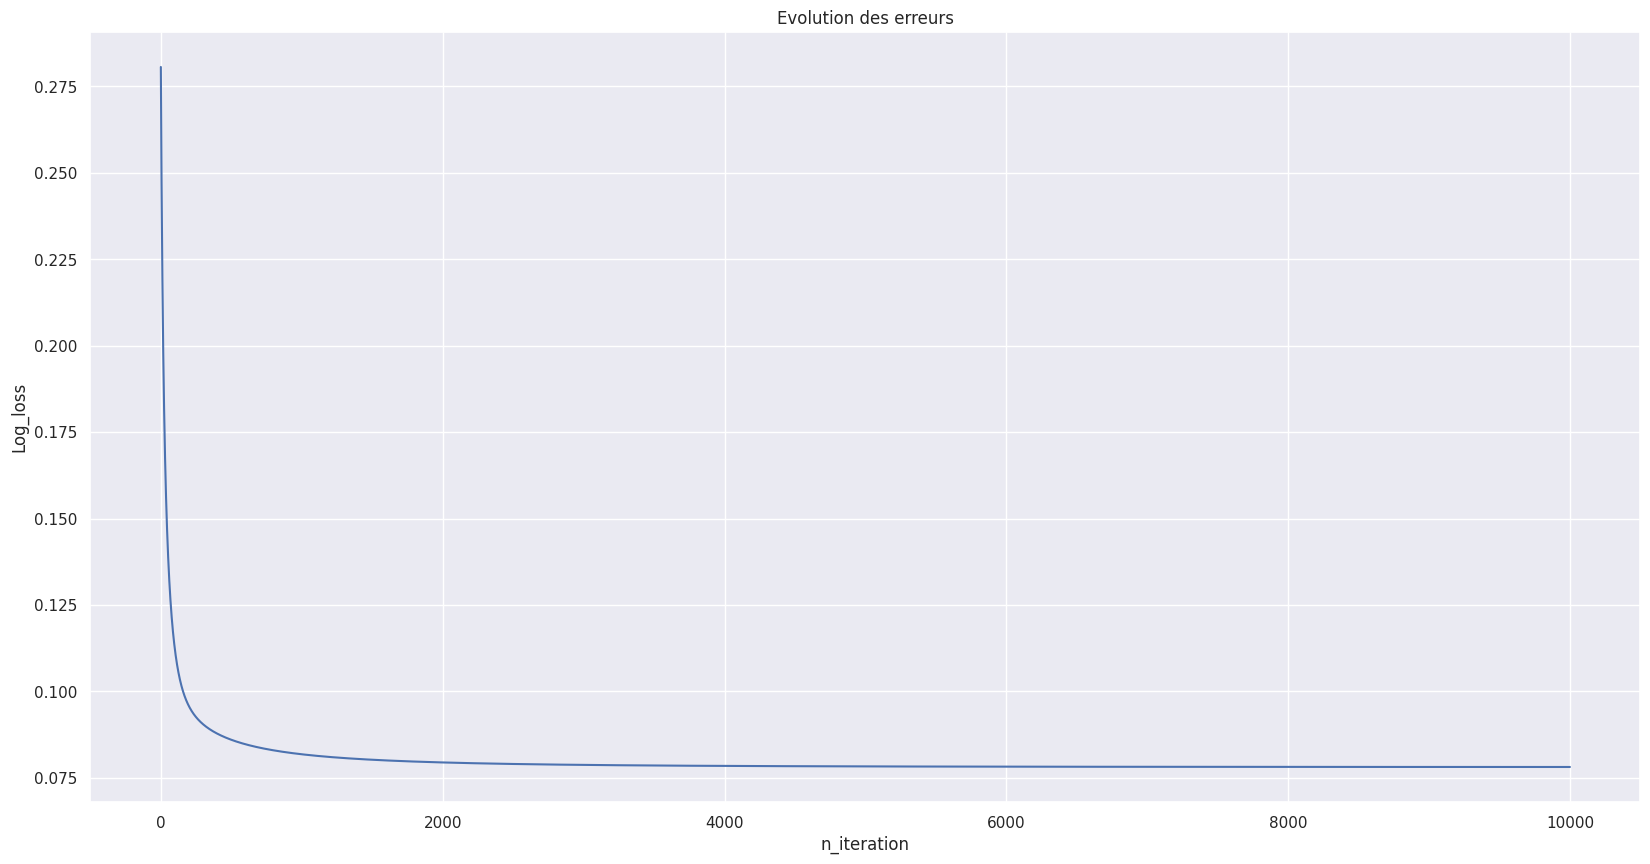

In [ ]:
# Soufiane MOUHTARAM

# print(loss_history)
plt.plot(loss_history)
plt.xlabel('n_iteration')
plt.ylabel('Log_loss')
plt.title('Evolution des erreurs')

In [ ]:
# Soufiane MOUHTARAM

X1=test_features['CO2'].to_numpy()
X2=test_features['Light'].to_numpy()
X3=test_features['Temperature'].to_numpy()
X4=test_features['Humidity'].to_numpy()


y=test_target.to_numpy()
#Reshaping Dim
X1_tarin=X1_tarin.reshape(X1.shape[0],1)
X2=X2.reshape(X2.shape[0],1)
X3=X3.reshape(X3.shape[0],1)
X4=X4.reshape(X4.shape[0],1)


y_train=y_train.reshape(y_train.shape[0],1)
y_train.shape
